# Retrieval of Product GTIN/Lot information

In [3]:
from IPython.display import Image
import subprocess
import shlex

Blue Nespresso Coffee Pods | Black Nespresso Coffee Pods | Blue Lindt Chocolate | Black Godiva Chocolate
- | - | - | -
![alt](min/BlueBarcode.JPG) | ![alt](min/BlackBarcode.JPG) |  ![alt](min/2BlueBarcode.JPG)|  ![alt](min/2BlackBarLot.JPG) | 

In [7]:
process = subprocess.Popen(shlex.split('zbarimg min/2BlueBarcode.JPG min/BlackBarcode.JPG min/BlueBarcode.JPG min/2BlackBarLot.JPG'), stdout=subprocess.PIPE)
out, err = process.communicate()
print(out.decode())

EAN-13:0037466026916
EAN-13:7640154067257
EAN-13:7630039679972
EAN-13:0031290114962



## Image 1: Blue Nespresso Coffee Pods 

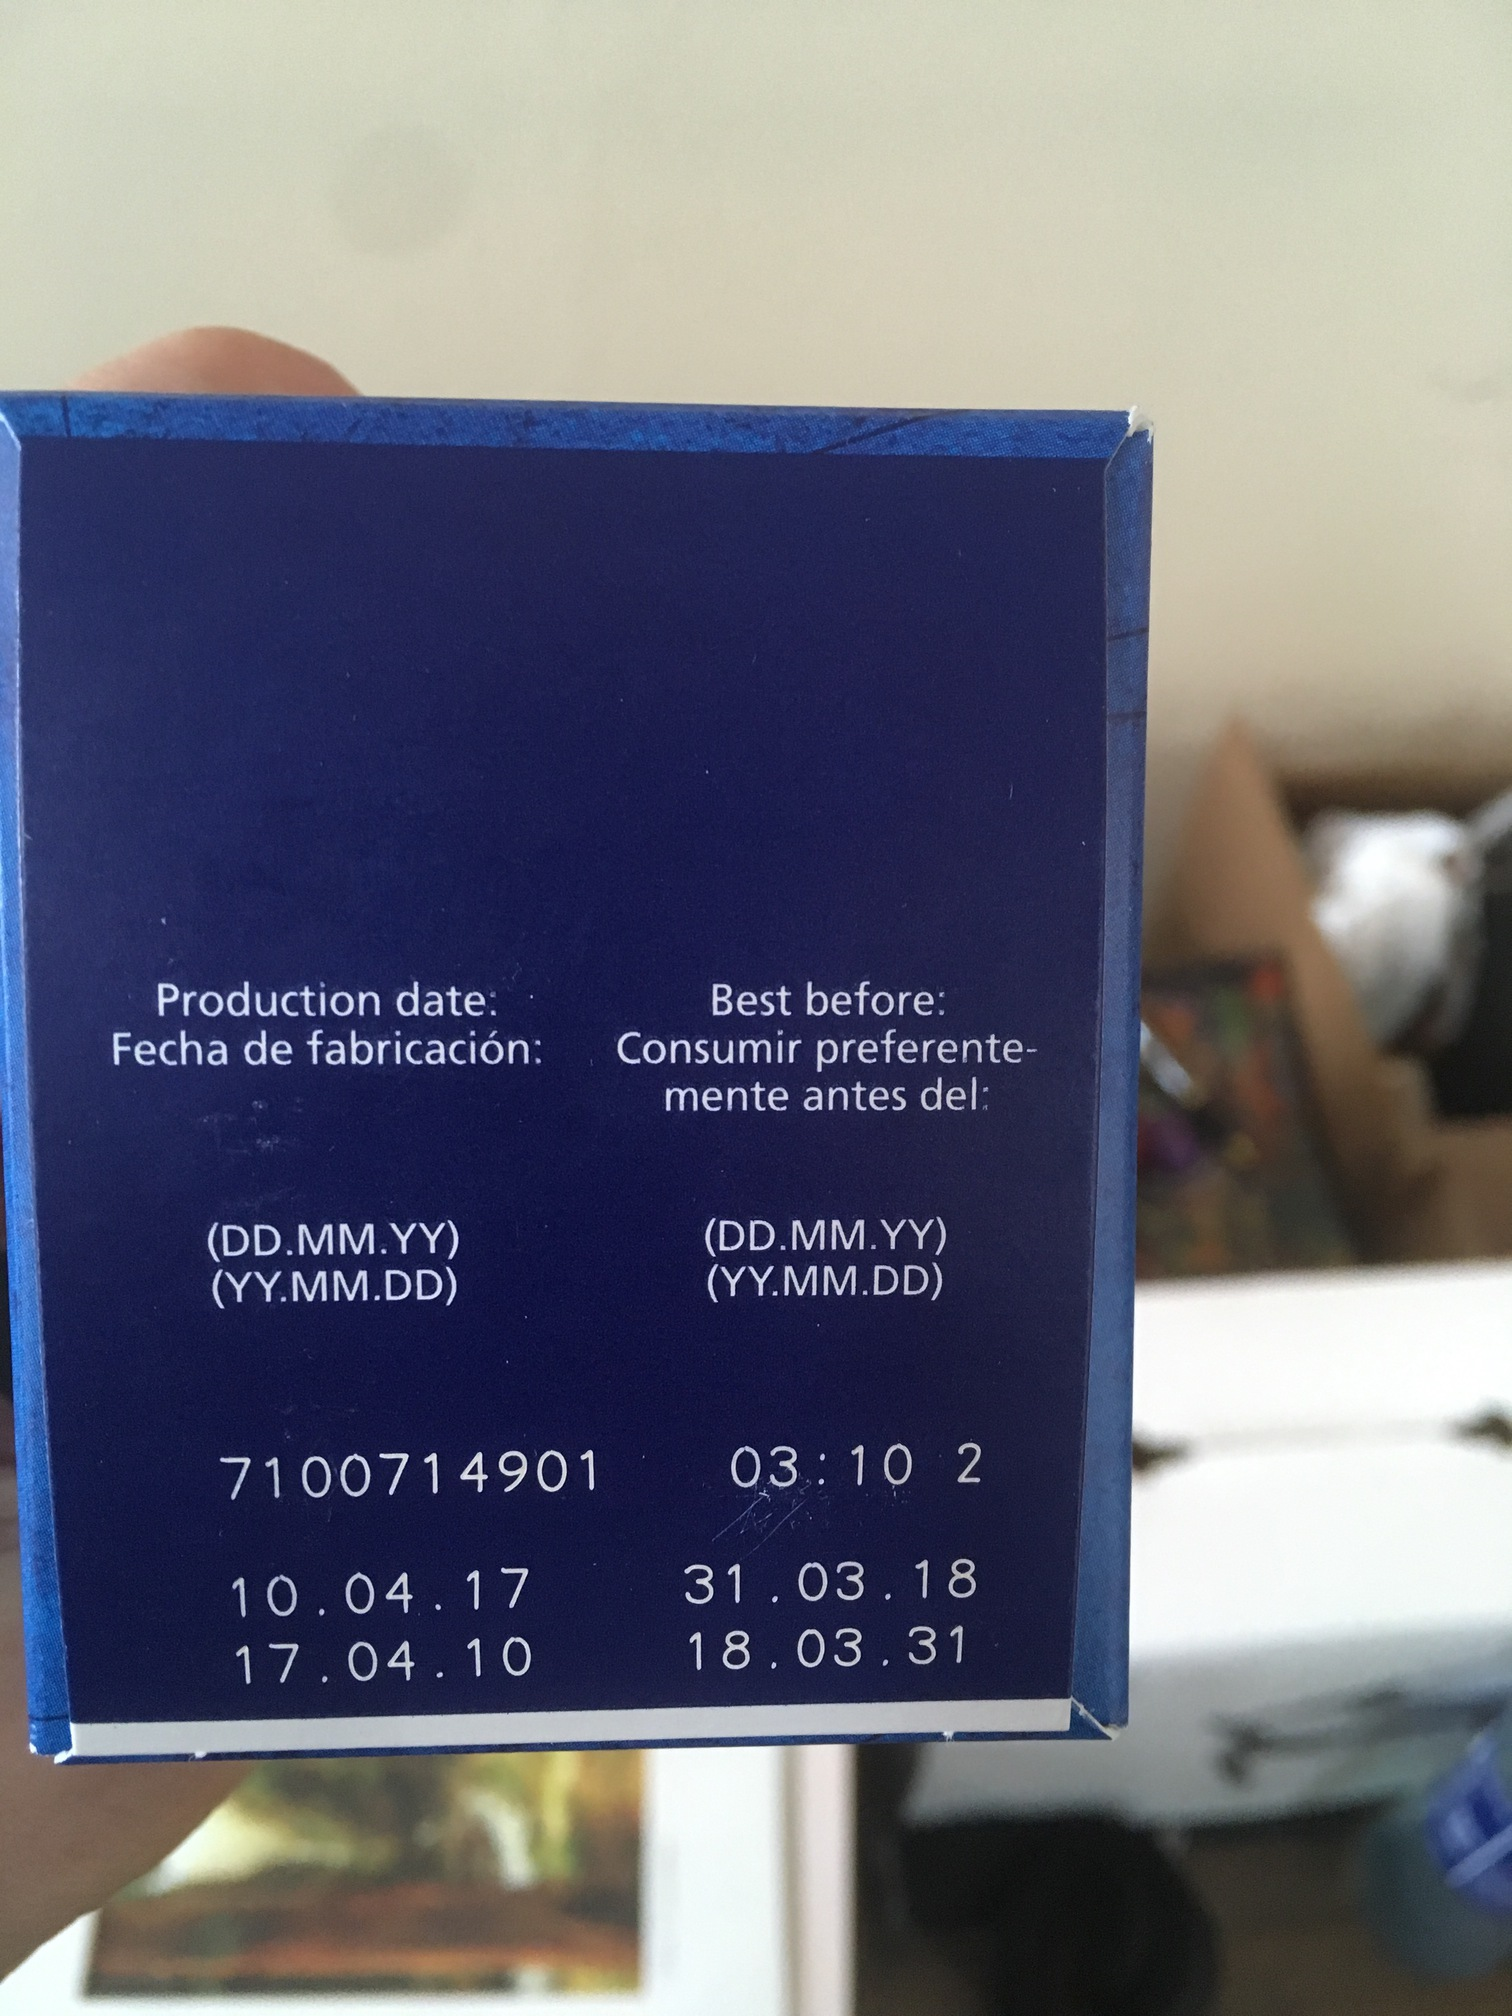

In [8]:
Image(filename='min/BlueLot.JPG', width=200, height=200) 

In [9]:
subprocess.call(shlex.split('tesseract min/BlueLot.JPG out --psm 11 --oem 2'))
process = subprocess.Popen(shlex.split('cat out.txt'), stdout=subprocess.PIPE)
out, err = process.communicate()
print("7100714901" in out.decode())

True


## Image 2: Black Nespresso Coffee Pods

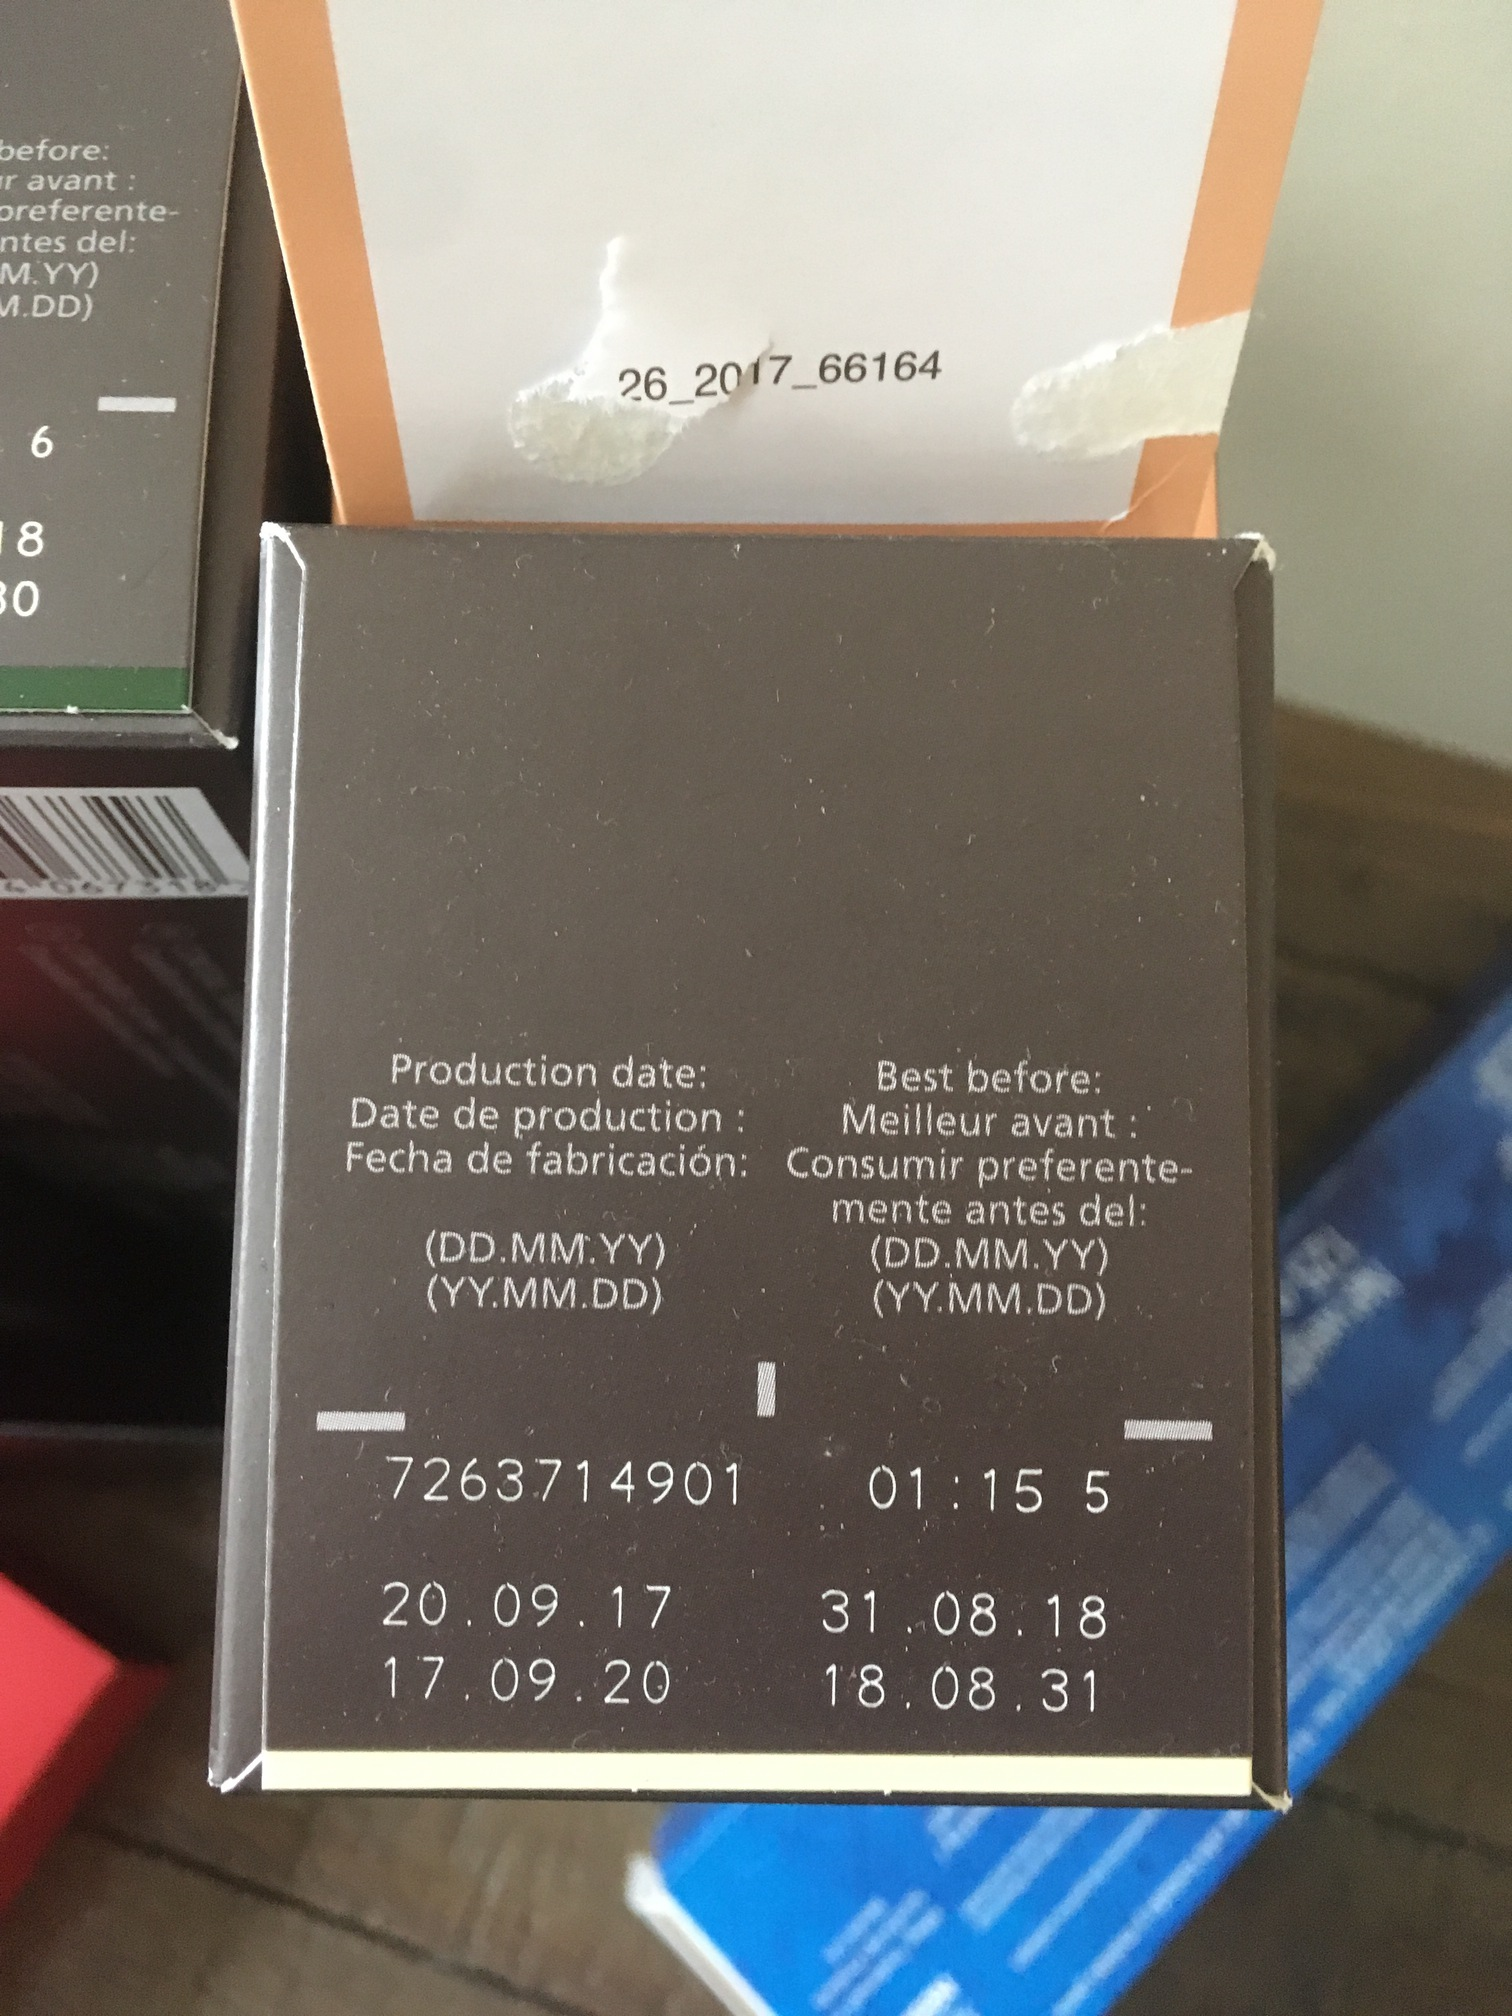

In [10]:
Image(filename='min/BlackLot.JPG', width=200, height=200) 

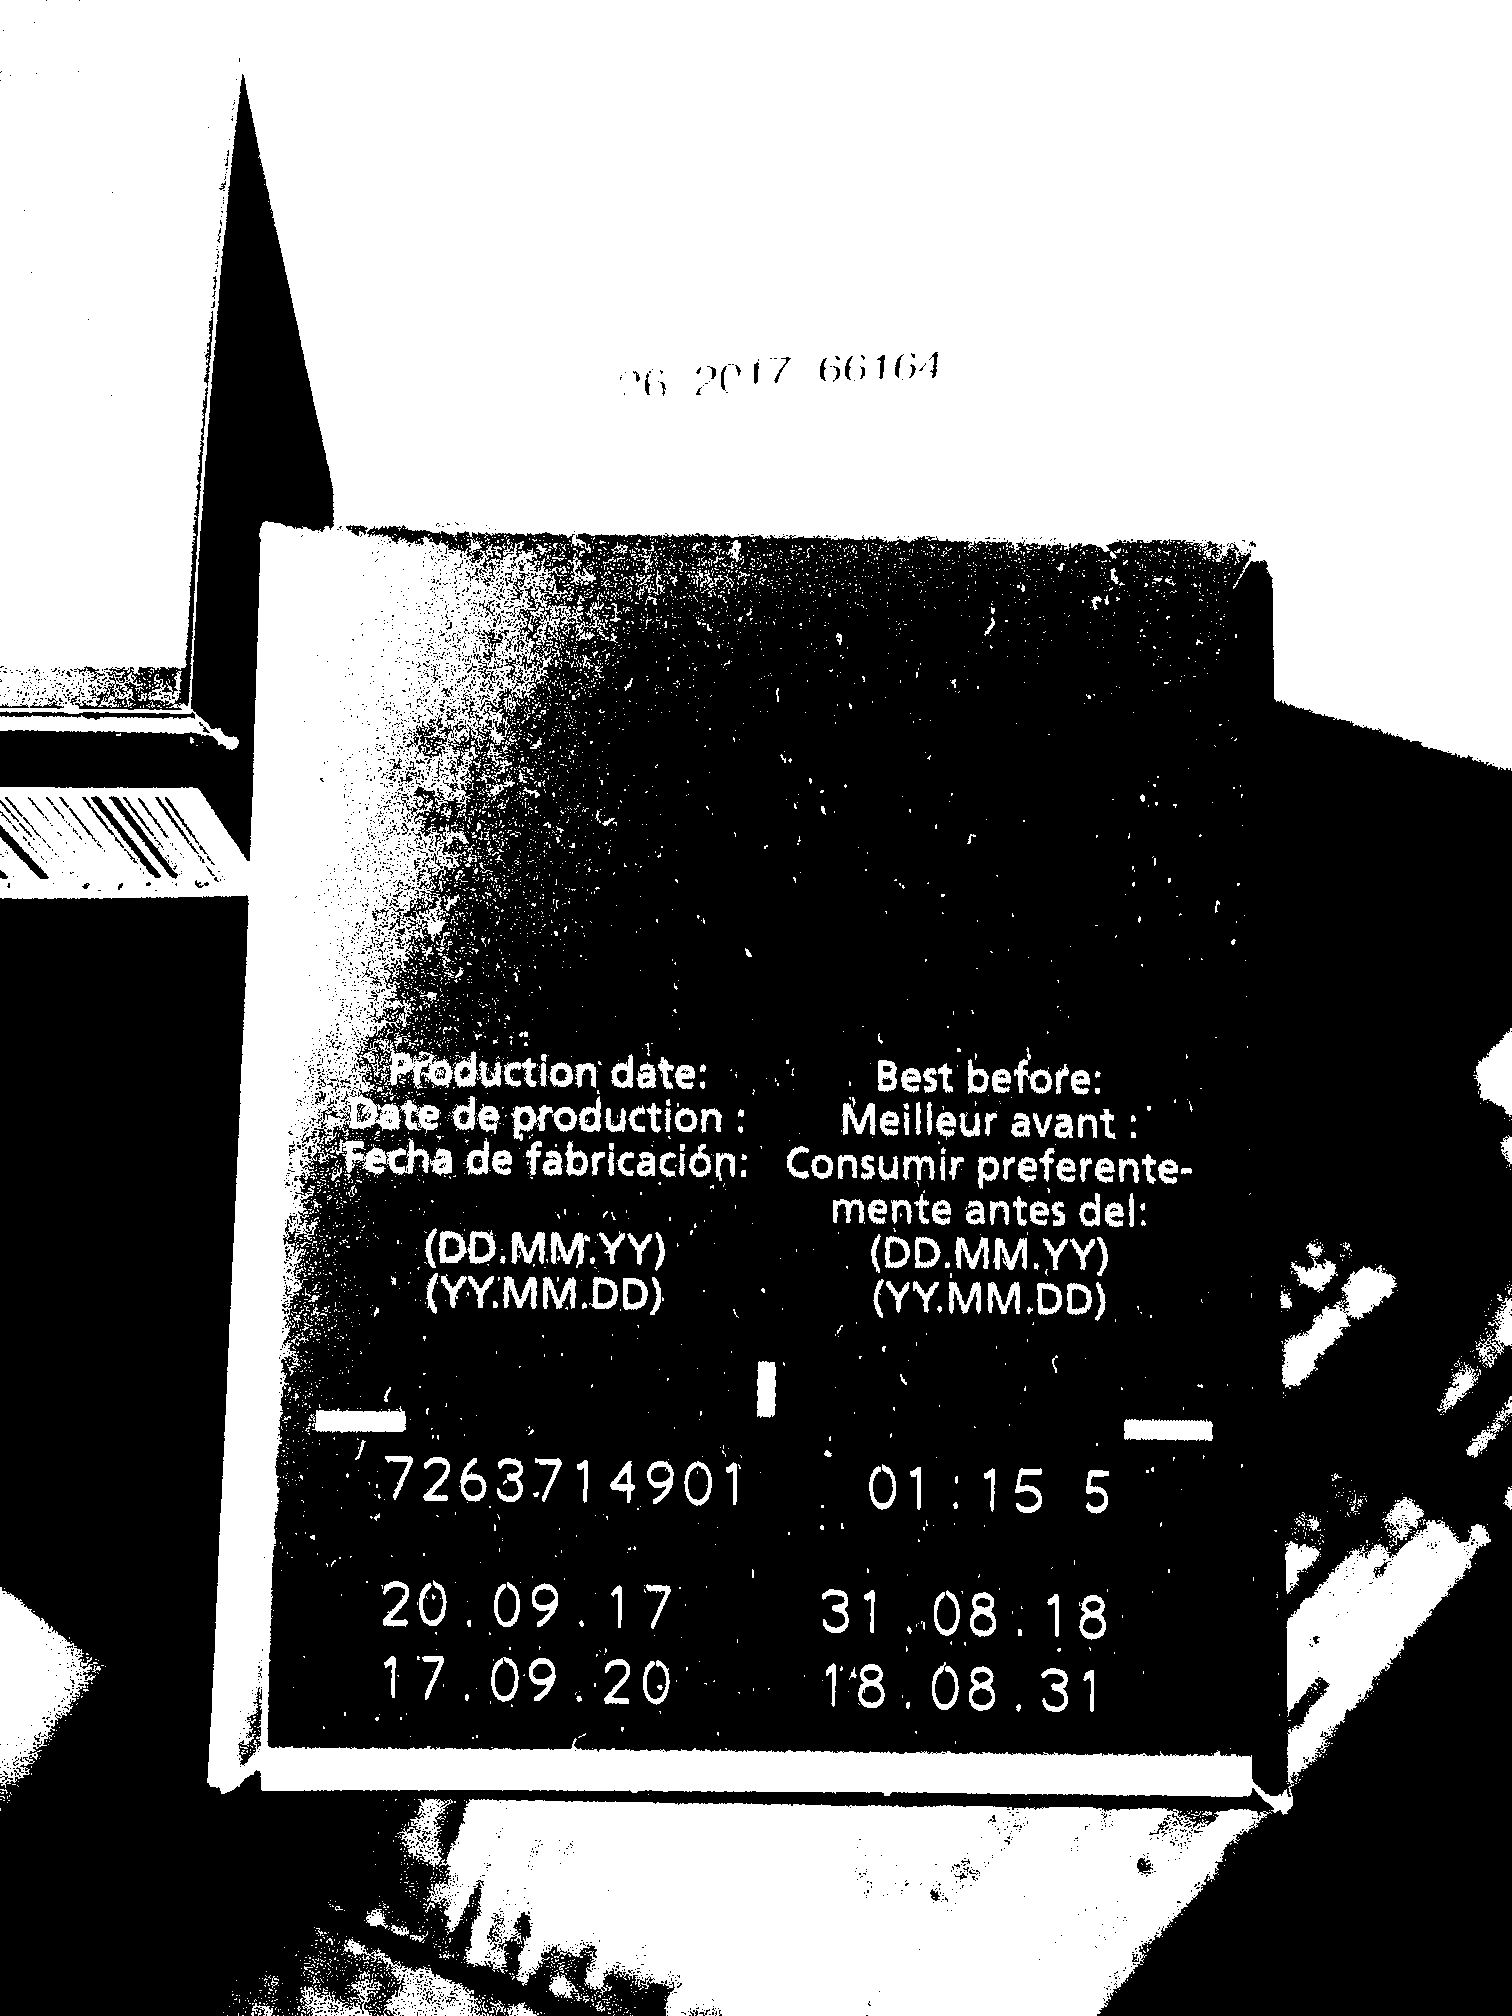

In [12]:
subprocess.call(shlex.split('convert min/BlackLot.JPG -threshold 40% result.png'))
Image(filename='result.png',width=200, height=200)

In [73]:
subprocess.call(shlex.split('tesseract result.png out --psm 11 --oem 2'))
process = subprocess.Popen(shlex.split('cat out.txt'), stdout=subprocess.PIPE)
out, err = process.communicate()
print("7263714901" in out.decode())

True


## Image 3: Blue Lindt Chocolate

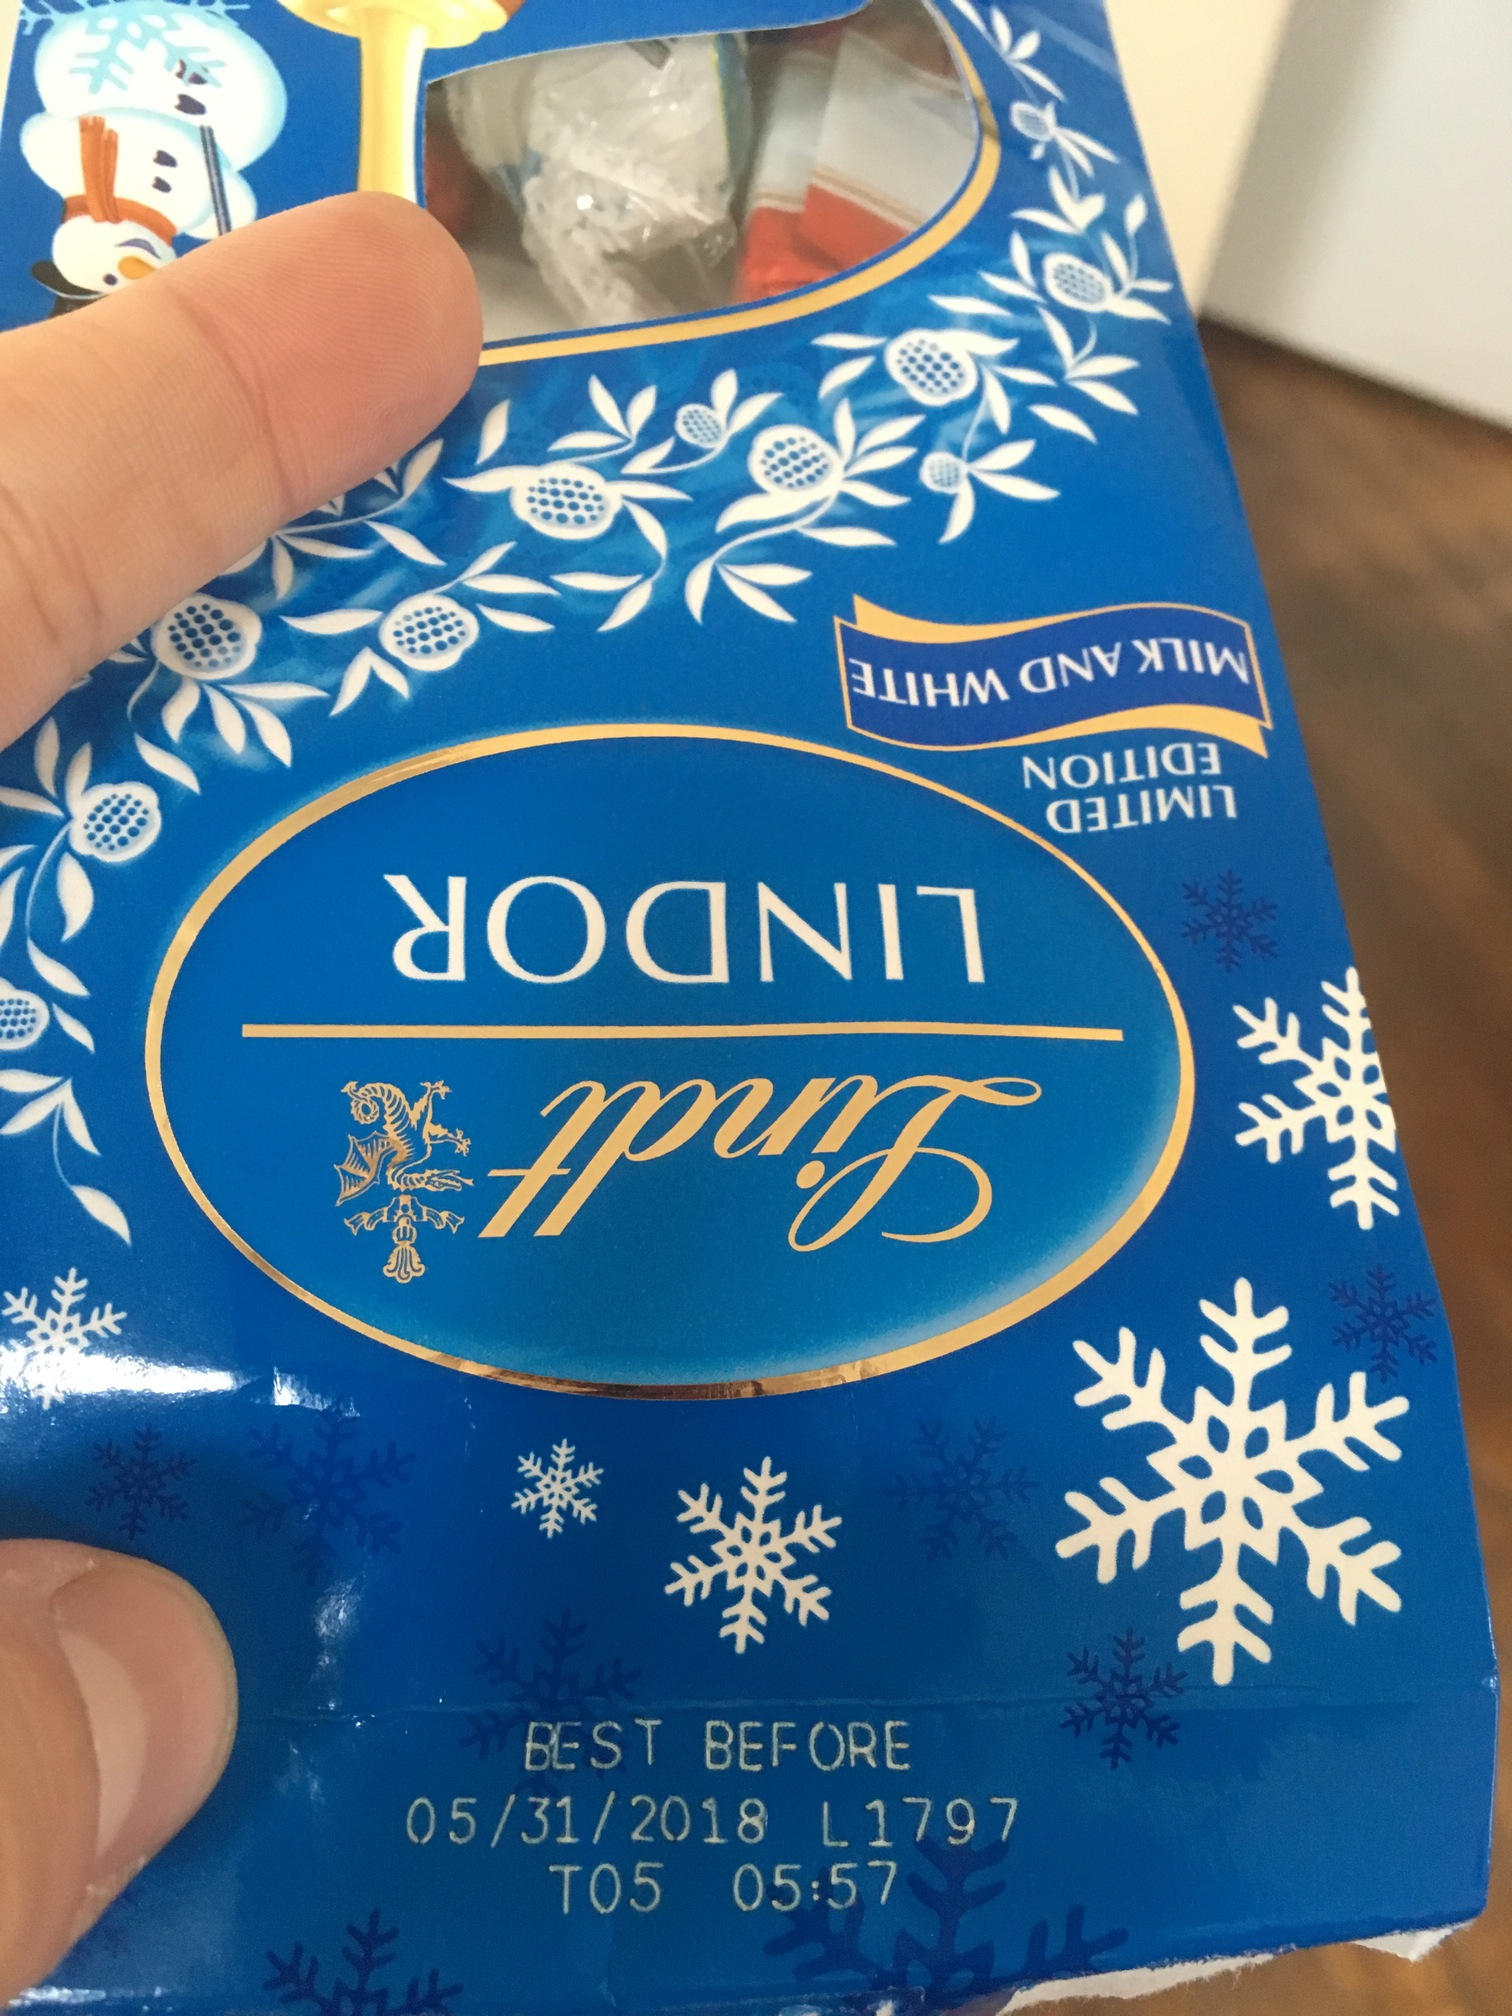

In [17]:
Image(filename='min/2BlueLot.JPG', width=200, height=200) 

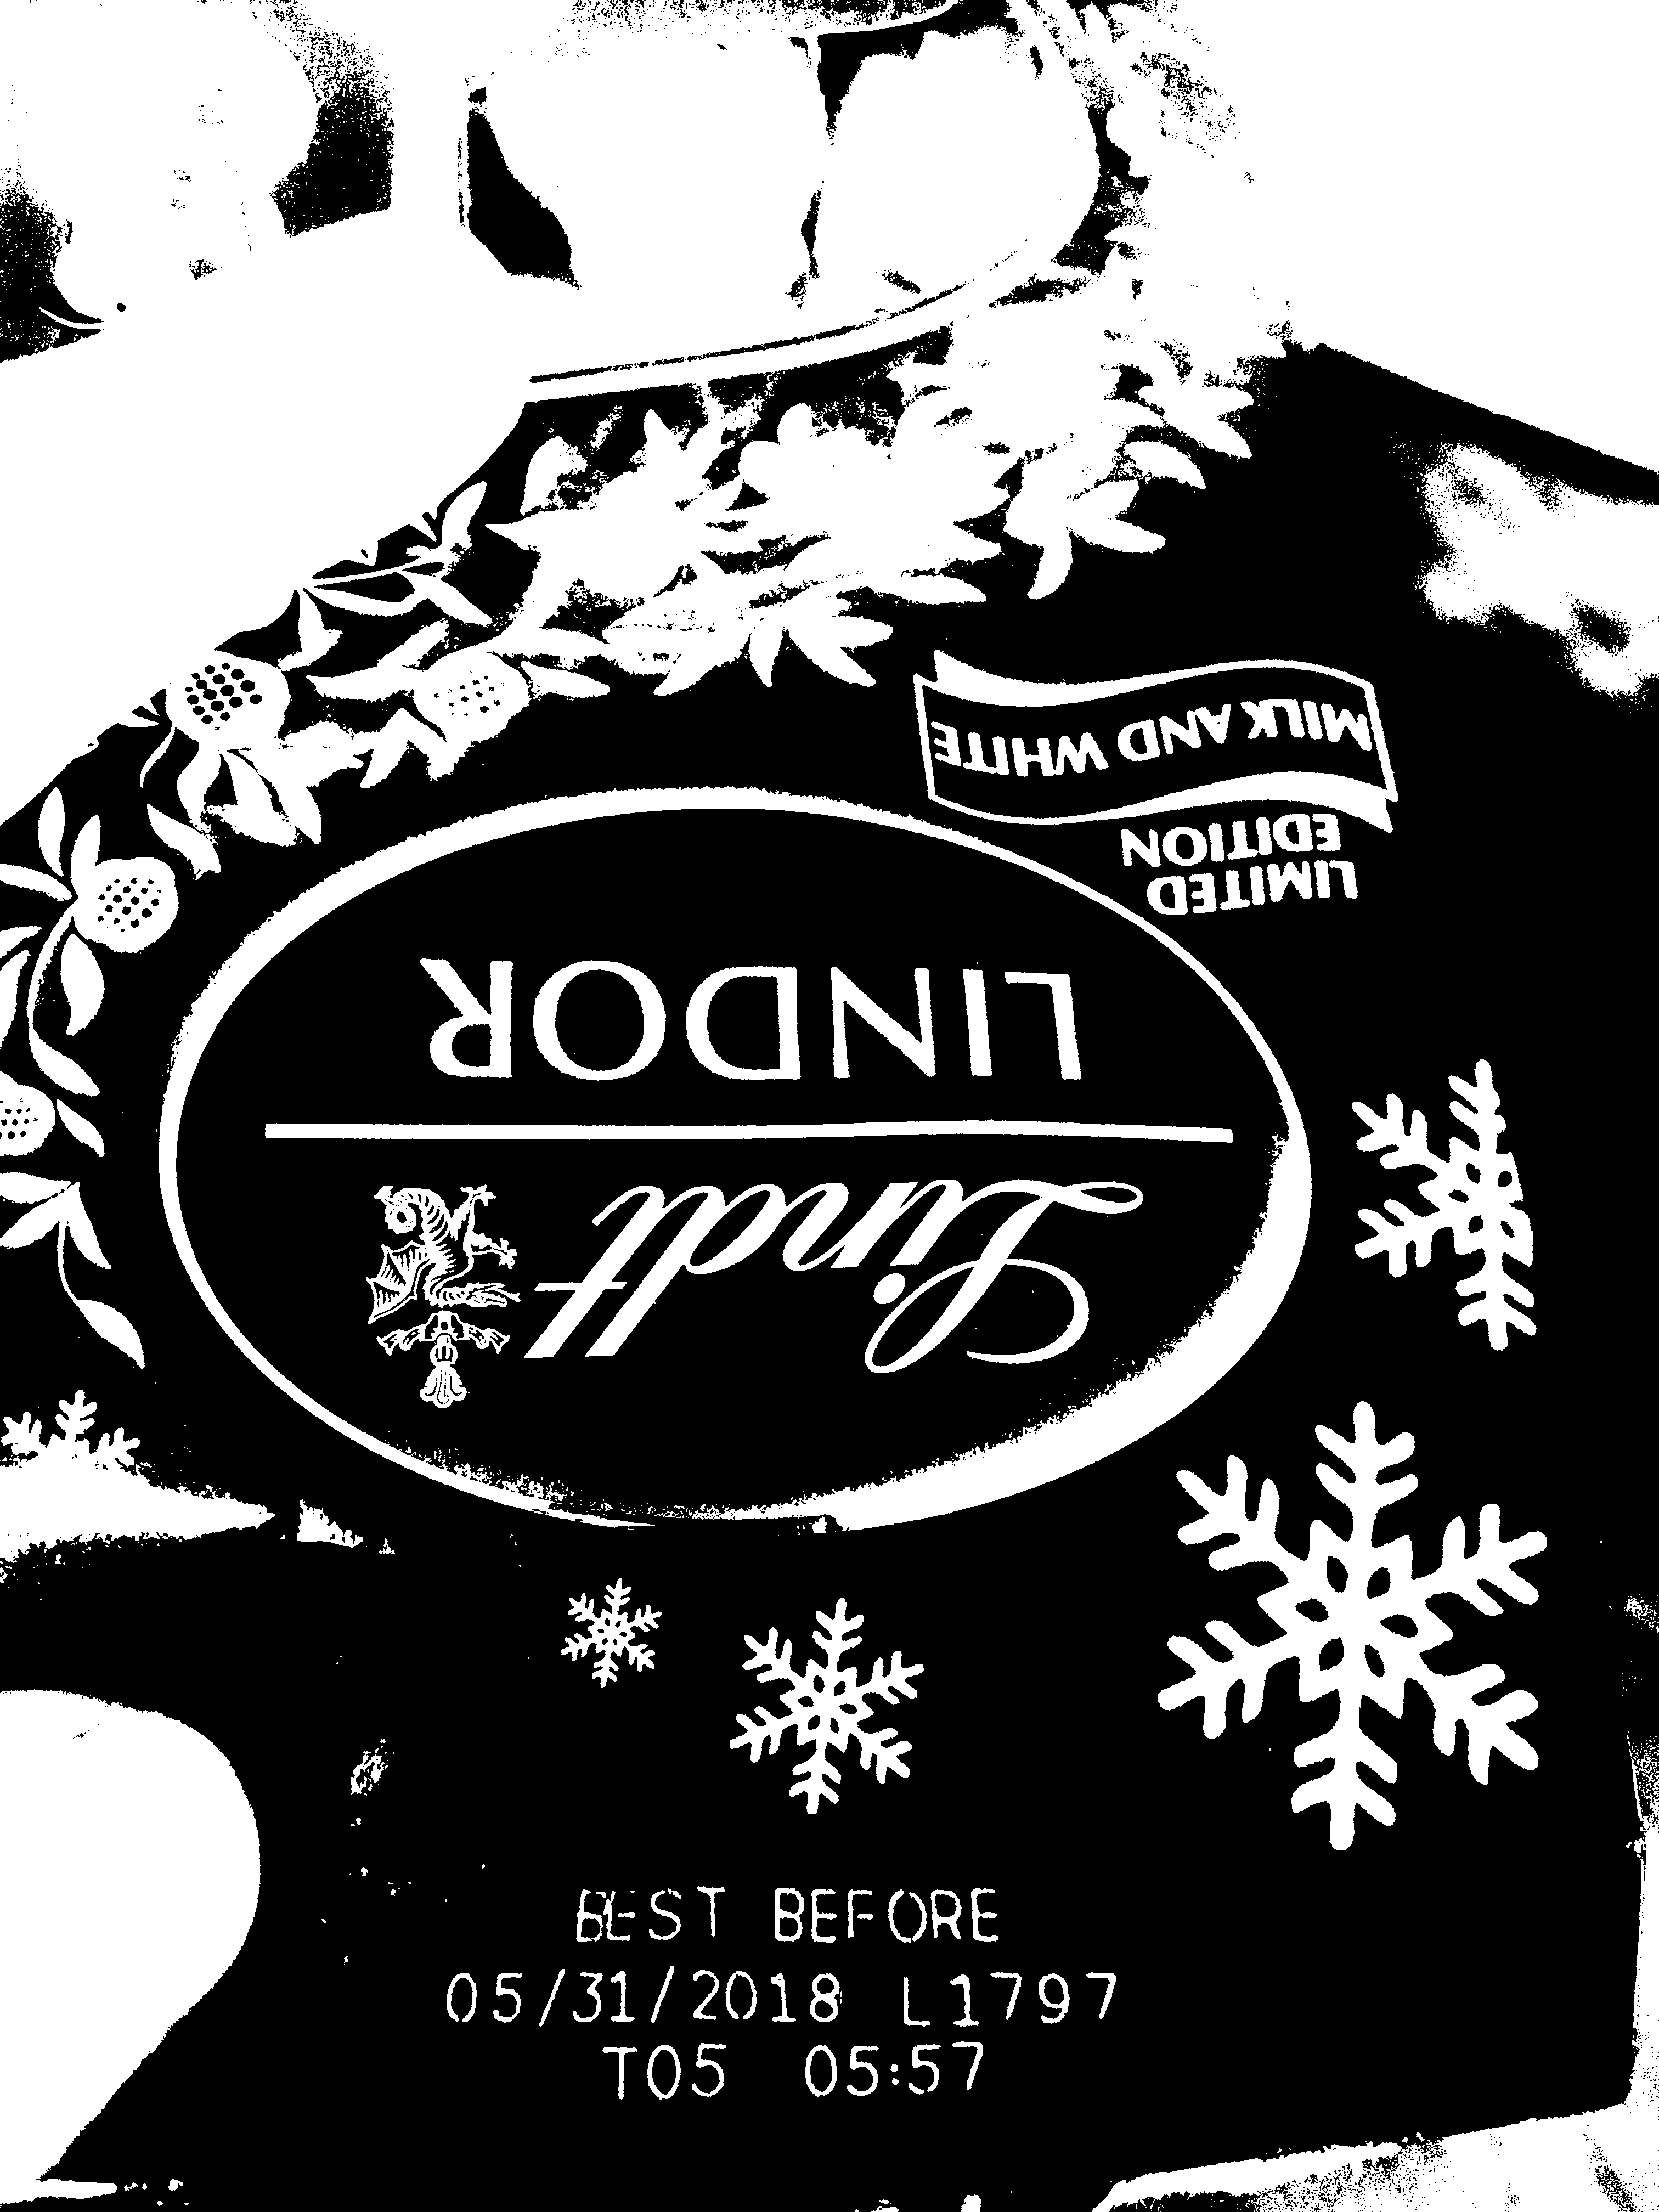

In [20]:
subprocess.call(shlex.split('convert 2BlueLot.JPG -threshold 40% result.png'))
Image(filename='result.png',width=200)

In [21]:
subprocess.call(shlex.split('tesseract result.png out --psm 11 --oem 2'))
process = subprocess.Popen(shlex.split('cat out.txt'), stdout=subprocess.PIPE)
out, err = process.communicate()
# print(out.decode())
print("L1797" in out.decode())

True


## Image 4: Black Godiva Chocolate

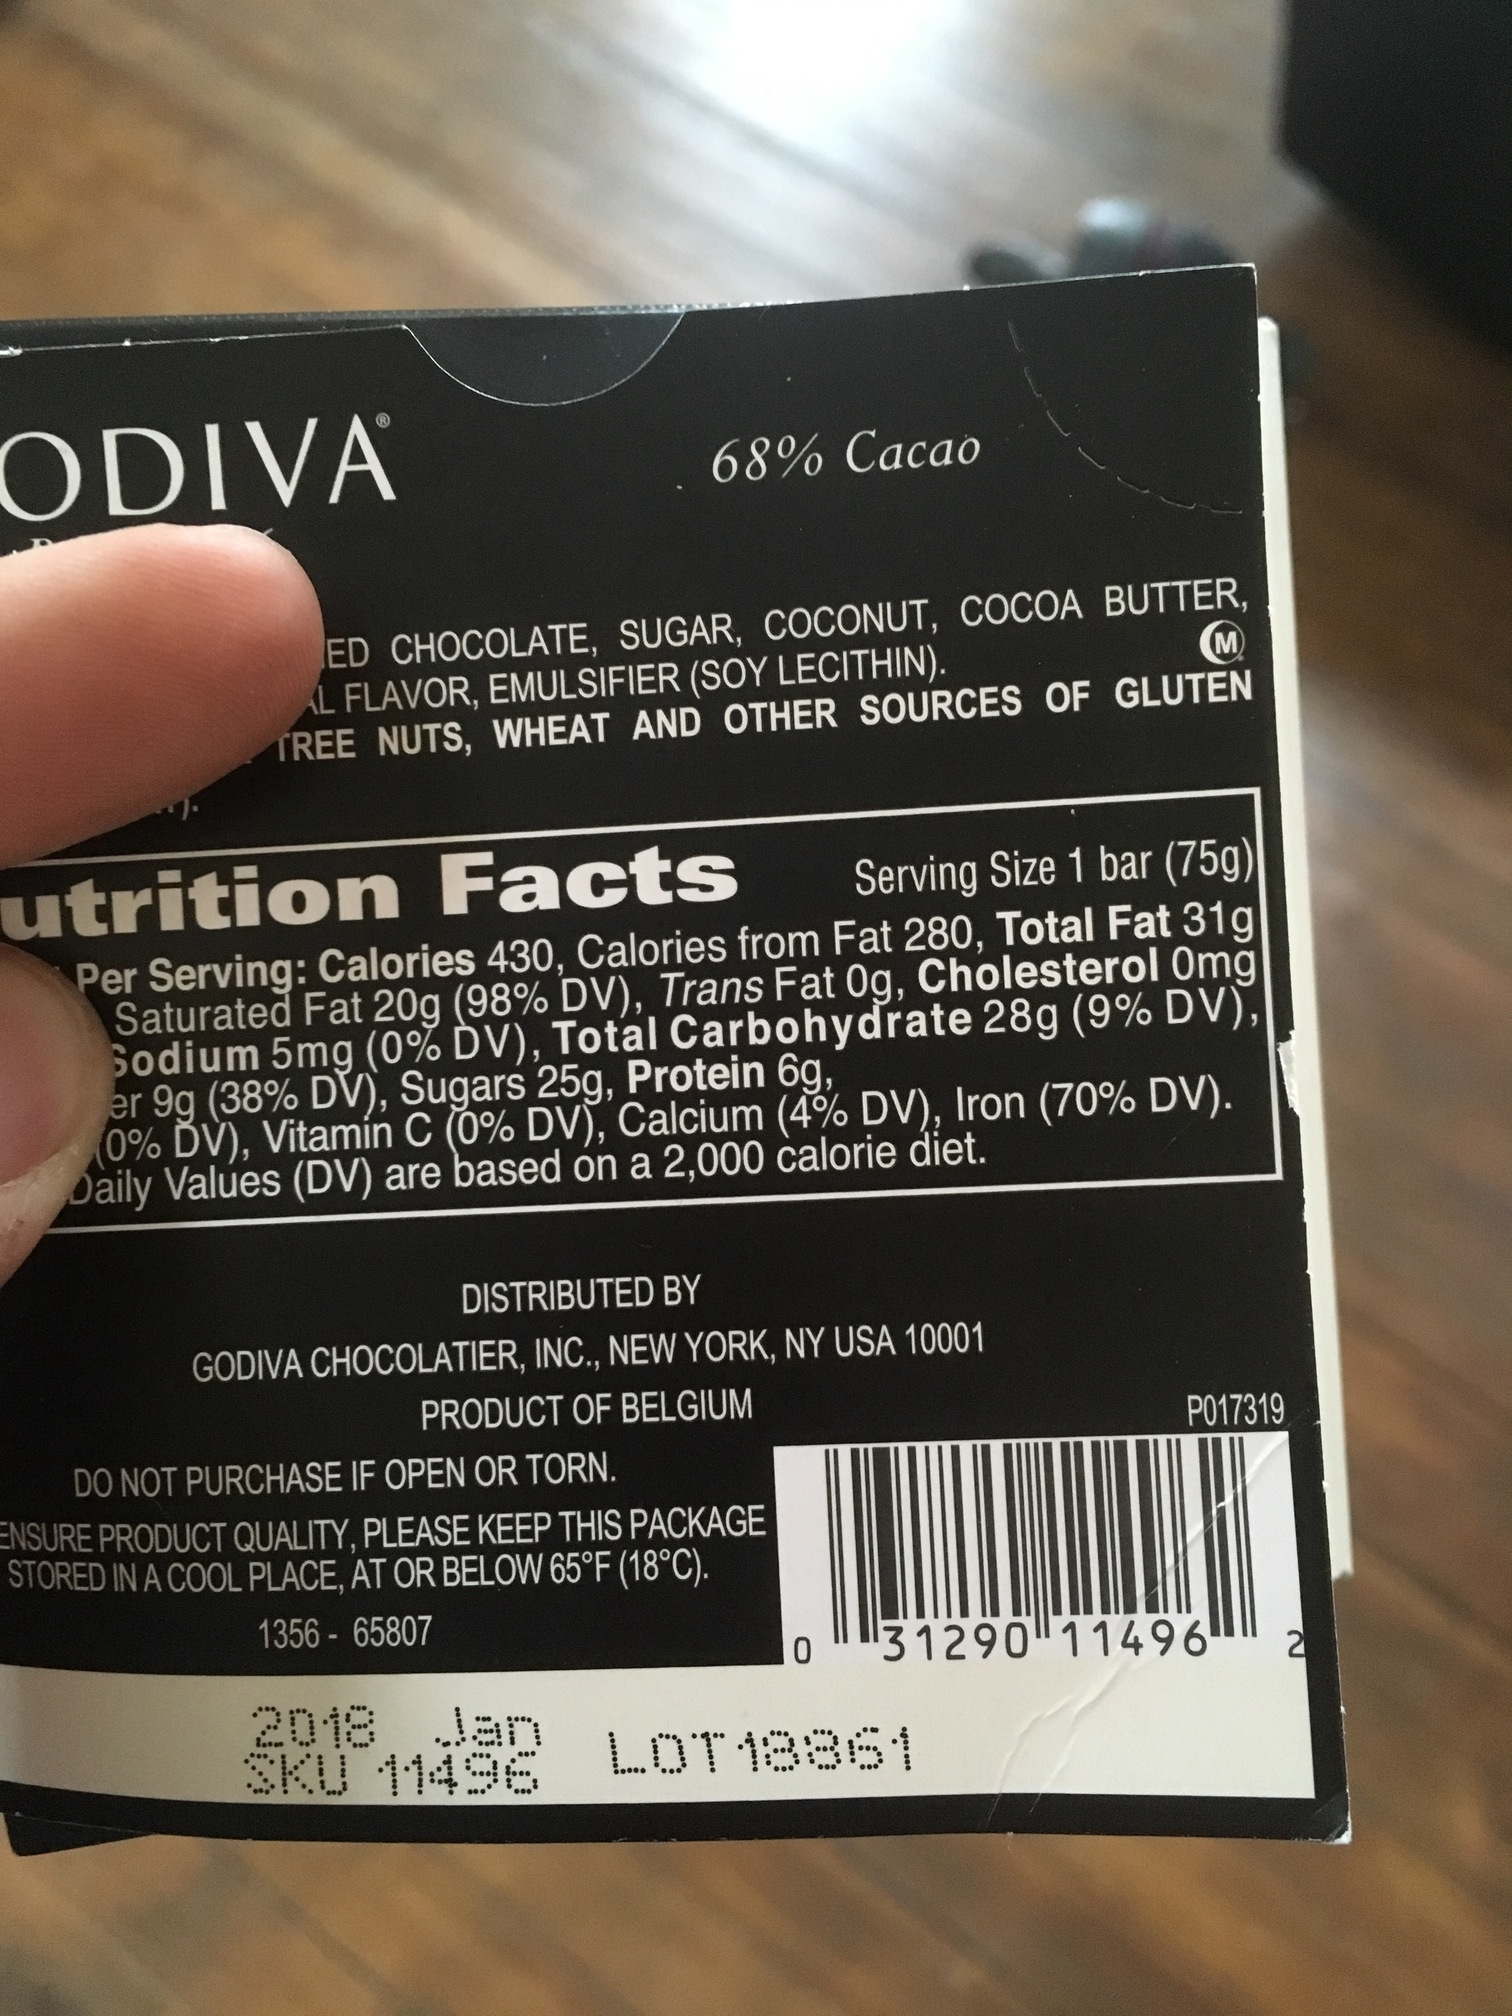

In [22]:
Image(filename='min/2BlackBarLot.JPG', width=200) 

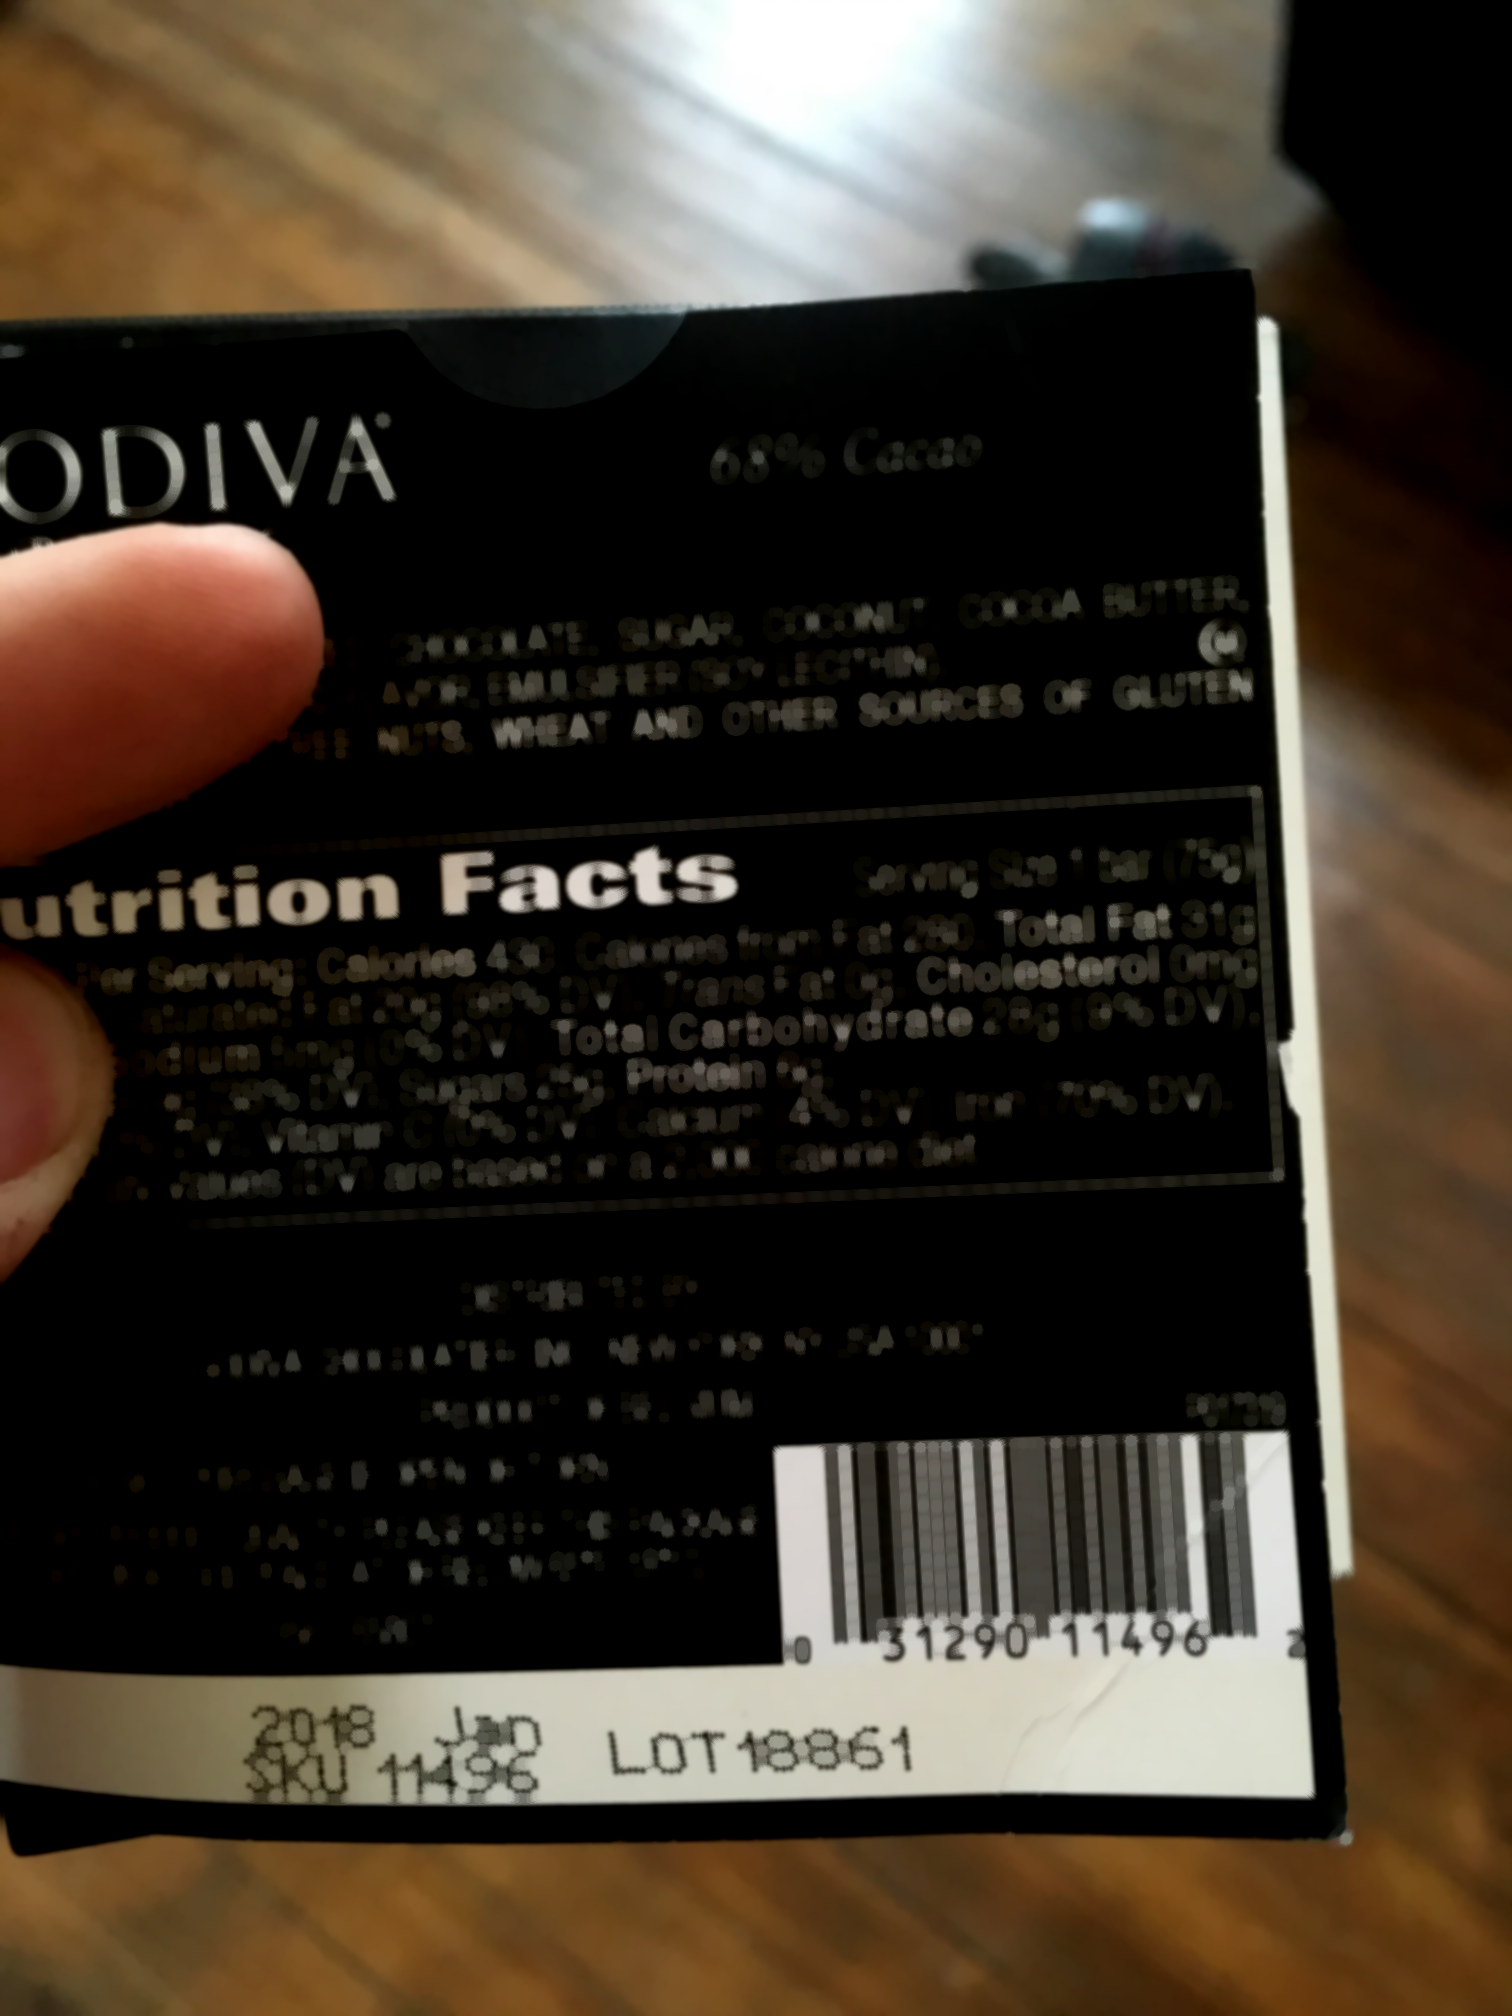

In [23]:
subprocess.call(shlex.split('convert min/2BlackBarLot.JPG -blur 0x2 -morphology open disk:5  -contrast-stretch 40x0%%  result.png'))
Image(filename='result.png',width=200)

In [26]:
subprocess.call(shlex.split('tesseract result.png out --psm 11 --oem 2'))
process = subprocess.Popen(shlex.split('cat out.txt'), stdout=subprocess.PIPE)
out, err = process.communicate()
print("18861" in out.decode())

True
